In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
Gradient is an extension of morphological operation which widely helpful for edge detection.
This is continuation of Gradients discussed in 'morphological_operators.ipynb'.

GRADIENT IS AN COLOR INTENSITY CHANGE TO ONE DIRECTION. THERE ARE ALGORITHMS THAT FIND THIS
DIRECTION OD GRADIENT.

In this lecture, we mainly discuss about Sobel-Feldman operators. Which could be used calculate
direction of the gradient and use for edge detection.
'''

"\nGradient is an extension of morphological operation which widely helpful for edge detection.\nThis is continuation of Gradients discussed in 'morphological_operators.ipynb'.\n\nGRADIENT IS AN COLOR INTENSITY CHANGE TO ONE DIRECTION. THERE ARE ALGORITHMS THAT FIND THIS\nDIRECTION OD GRADIENT.\n\nIn this lecture, we mainly discuss about Sobel-Feldman operators. Which could be used calculate\ndirection of the gradient and use for edge detection.\n"

In [11]:
def display_image(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

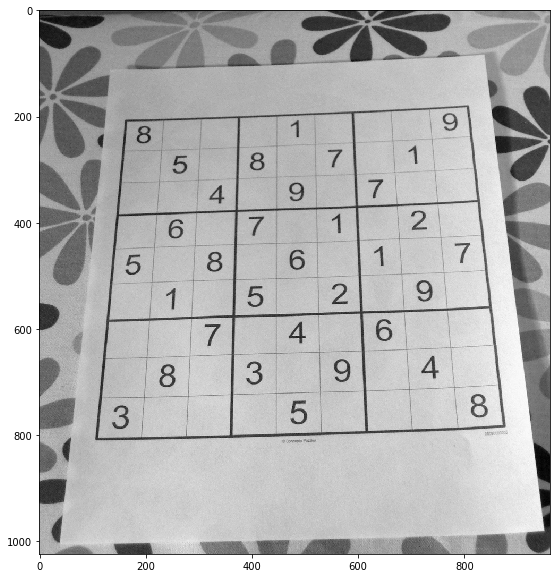

In [13]:
img = cv2.imread('../../notebooks/DATA/sudoku.jpg', flags=0)
display_image(img)

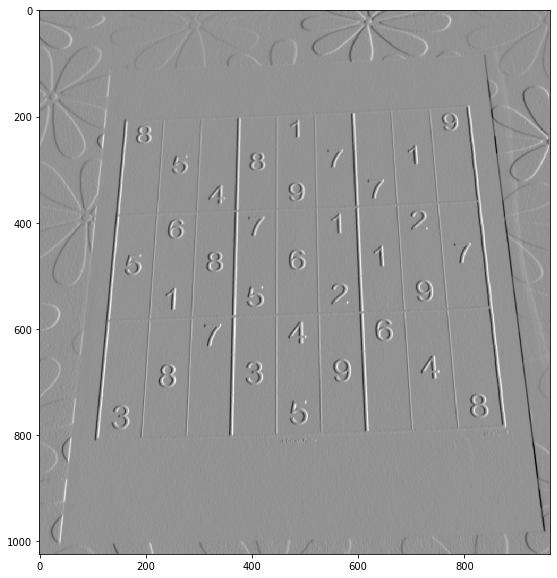

In [18]:
# PERFORM SOBEL OPERATION WITH OPENCV.
sobelX = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=True, dy=False, ksize=5)
display_image(sobelX)

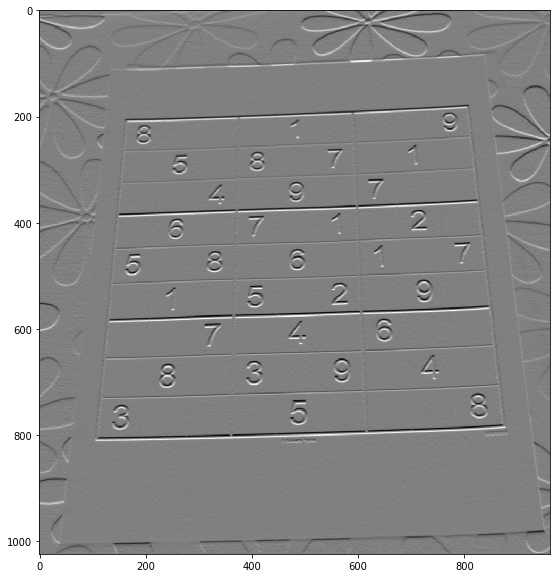

In [22]:
sobelY = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=False, dy=True, ksize=5)
display_image(sobelY)

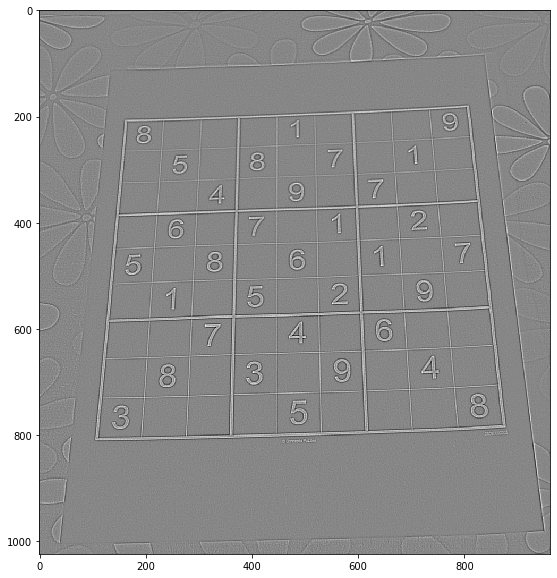

In [23]:
# LAPLACIAN(Fundamental operator in Calculus) operator to do the X and Y SOBEL operations at once.
laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=5)
display_image(laplacian)
# Although, we can use 'cv2.Sobel' to calculate X and Y gradient at once. Laplacian operation gives
# more promising results.

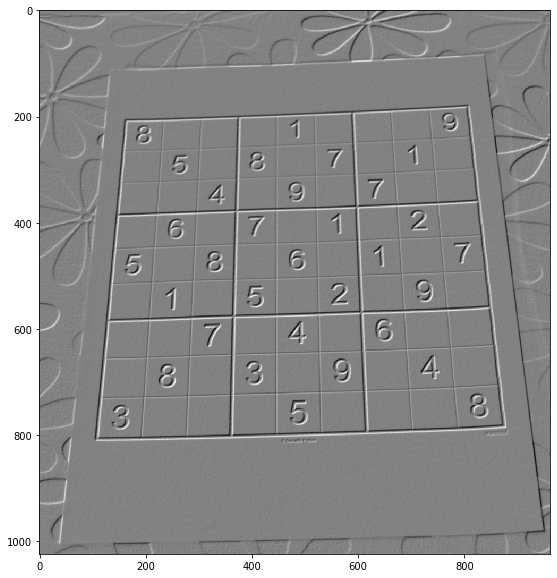

In [26]:
# If the Laplacian operation do not give what we want exactly, always we can use BLENDING operations
# we studied earlier.
blended = cv2.addWeighted(src1=sobelX, alpha=0.5, src2=sobelY, beta=0.5, gamma=1)
display_image(blended)


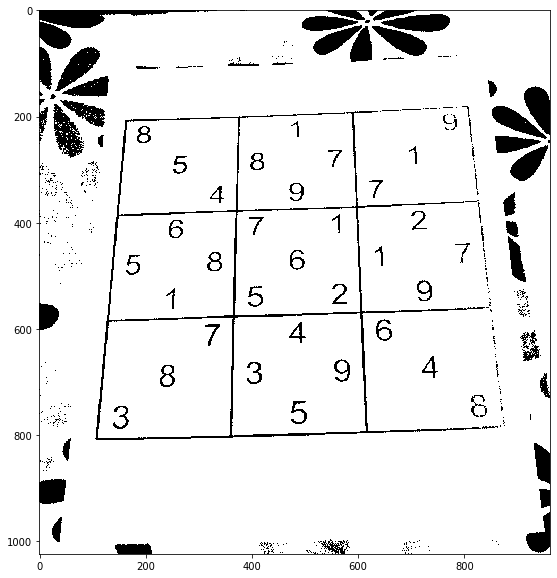

In [30]:
# Adding threshold to original image.
_, threshold = cv2.threshold(img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
display_image(threshold)

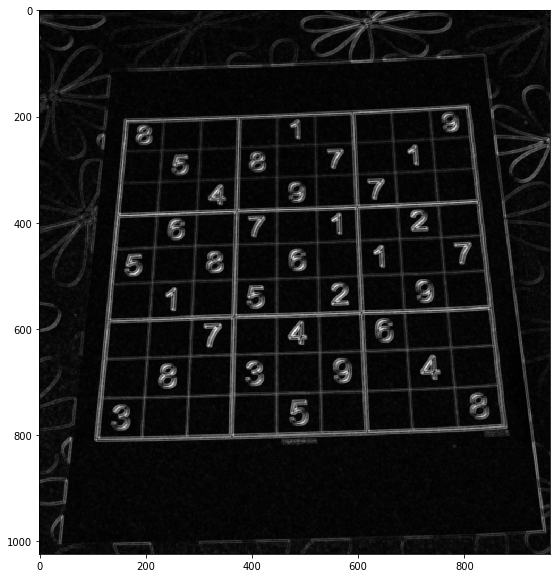

In [31]:
# Adding morphological operator to blended image.
kernel = np.ones((4, 4), dtype=np.uint8)
result = cv2.morphologyEx(blended, op=cv2.MORPH_GRADIENT, kernel=kernel)
display_image(result)

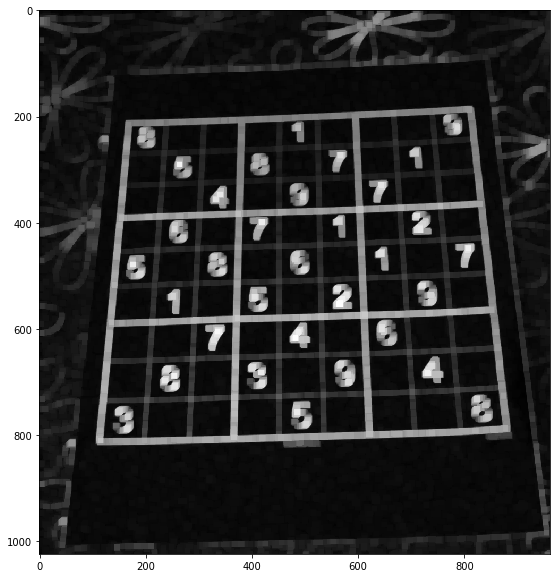

In [34]:
# To reduce noise morphological dilate.
result = cv2.morphologyEx(result, op=cv2.MORPH_OPEN, kernel=kernel, iterations=3)
display_image(result)